In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization
from sklearn.preprocessing import LabelEncoder # label encoding
from sklearn.model_selection import train_test_split # train, test split
from sklearn.preprocessing import StandardScaler # normalization
from sklearn.neighbors import KNeighborsClassifier # KNN model
from sklearn.svm import SVC # SVC model
from xgboost import XGBClassifier # XGBoost model
from sklearn.model_selection import GridSearchCV, cross_val_score # Gridsearch
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve# results

import joblib

import warnings # ignore warning
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
df = pd.read_csv("../data/processed/german_credit_data_processed.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sex                          1000 non-null   int64  
 1   Credit amount                1000 non-null   float64
 2   Duration                     1000 non-null   int64  
 3   Risk                         1000 non-null   int64  
 4   Job_1                        1000 non-null   bool   
 5   Job_2                        1000 non-null   bool   
 6   Job_3                        1000 non-null   bool   
 7   Housing_own                  1000 non-null   bool   
 8   Housing_rent                 1000 non-null   bool   
 9   Saving accounts_moderate     1000 non-null   bool   
 10  Saving accounts_quite rich   1000 non-null   bool   
 11  Saving accounts_rich         1000 non-null   bool   
 12  Checking account_moderate    1000 non-null   bool   
 13  Checking account_ri

<a id="6"></a>
# 3) Modeling

In [6]:
y = df.Risk
X = df.drop("Risk", axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

* Separated data as train and test.

In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

* Applied standart scaling.

<a id="7"></a>
## KNN(K-Nearest Neighbors) Model

In [8]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print('With KNN (K=3) accuracy is: ',knn_model.score(X_test,y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

With KNN (K=3) accuracy is:  0.7
[[ 15  44]
 [ 16 125]]
              precision    recall  f1-score   support

           0       0.48      0.25      0.33        59
           1       0.74      0.89      0.81       141

    accuracy                           0.70       200
   macro avg       0.61      0.57      0.57       200
weighted avg       0.66      0.70      0.67       200



* Accuracy is 0.69 (K = 3)

* Checking max. accuracy with graph.

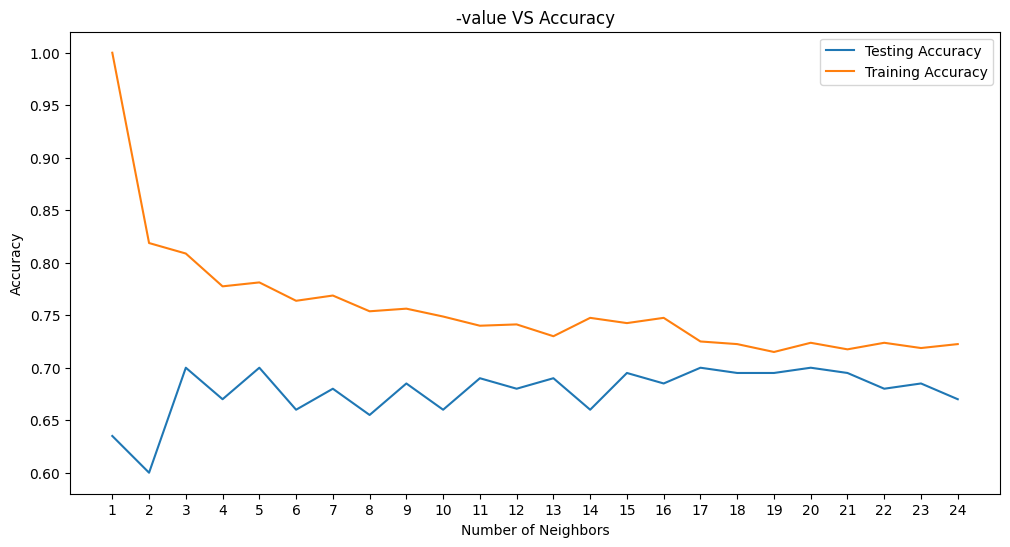

Best accuracy is 0.7 with K = 3


In [9]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn_model = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn_model.fit(X_train,y_train)
    #train accuracy
    train_accuracy.append(knn_model.score(X_train, y_train))
    # test accuracy
    test_accuracy.append(knn_model.score(X_test, y_test))

# Plot
plt.figure(figsize=[12,6])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [10]:
knn_model = KNeighborsClassifier(n_neighbors = 23)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print('With KNN (K=23) accuracy is: ',knn_model.score(X_test,y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

With KNN (K=23) accuracy is:  0.685
[[  7  52]
 [ 11 130]]
              precision    recall  f1-score   support

           0       0.39      0.12      0.18        59
           1       0.71      0.92      0.80       141

    accuracy                           0.69       200
   macro avg       0.55      0.52      0.49       200
weighted avg       0.62      0.69      0.62       200



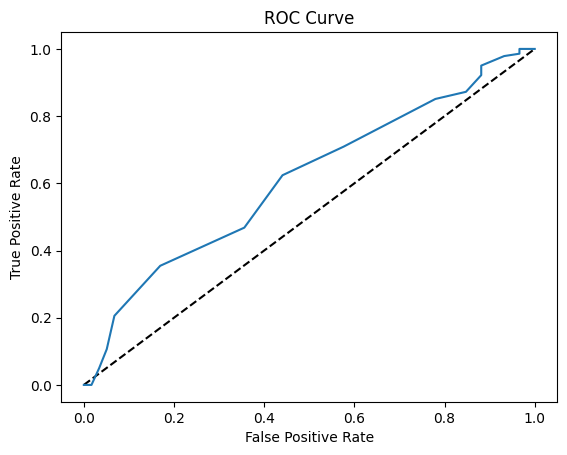

In [11]:
#Predicting proba
y_pred_prob = knn_model.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

* Max accuracy is 0.725(K=23)

<a id="8"></a>
## SVC(Support Vector Classification) Model

In [28]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred)-.02)

Accuracy Score: 0.6849999999999999


<a id="9"></a>
## XGBoost Model

In [20]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print(accuracy_score(y_pred_xgb, y_test))

0.66


In [21]:
xgb_params = {"n_estimators": [100, 500, 1000, 2000],
             "subsample": [0.6, 0.8, 1.0],
             "max_depth": [3, 4, 5, 6],
             "learning_rate": [0.1, 0.01, 0.02, 0.05],
             "min_samples_split": [2,5,10]}
xgb = XGBClassifier()
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100, subsampl

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=1000,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=1000,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, sub

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsam

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=500, subsam

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=500, subsampl

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=1000,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=1000,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=500,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=500,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimat

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimat

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=20

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_split=10, n_estimators=2000, 

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subsampl

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subsampl

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subs

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=100, subsampl

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=500, sub

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=500, subsampl

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, 

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s



/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=100,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=100,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=500,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=500,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimat

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, 

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100, su

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=100, su

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subs

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subsampl

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsam

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, sub

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=100, subsamp

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=2, n_estimators=2000, subs

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=500, subsampl

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=500, subsampl

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=1000,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:39:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=20

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_split=10, n_estimators=2000, 

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=500, subsampl

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=500, subsampl

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=100, subsa

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=100, subs

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=100, subsam

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=2000, subsa

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=500, subsampl

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=500, subsampl

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=10

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=5

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=500,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimator

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimat

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimat

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=200

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=10

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=500,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimat

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimat

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimat

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimat

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=5, n_estimat

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_e

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, 

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, 

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=500,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=500,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimat

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=100

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=5

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimat

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimat

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimat

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimat

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, 

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=10

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_split=10, n_estimators

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=500,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.1s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.1s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.1s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.1s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.1s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   1.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   1.6s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   1.6s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   1.6s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   1.7s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   1.6s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   1.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   1.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   2.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   1.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   1.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   1.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   1.1s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   1.1s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   1.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   1.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   2.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   2.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   2.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   2.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   2.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   2.1s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   2.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=100

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=10

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=100

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=50

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.8s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.8s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.1s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:40:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.8s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.9s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.9s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   1.1s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   1.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   1.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   1.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.8s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.8s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=10

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=10

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=50

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.01, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=50

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimat

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=10

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=500

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=500,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimat

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.1s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimat

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=5, n_estimat

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_es

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, 

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, 

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, 

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimat

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.9s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   1.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   1.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   1.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   1.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   2.4s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   2.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   2.5s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   2.5s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   3.4s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   3.6s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   3.5s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   2.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   2.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   2.8s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   2.7s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   2.6s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.1s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   1.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   1.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   1.4s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   1.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=10

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=500,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=500,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimat

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   1.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   1.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   1.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   1.4s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   1.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   1.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   1.4s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   1.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimator

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.4s

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimator

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.8s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=10

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=10

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=5

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   1.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.8s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.9s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.9s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.1s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.1s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   1.6s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   1.6s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   1.4s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   1.5s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   3.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   3.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   3.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   3.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   3.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   3.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   3.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   3.2s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, 

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=200

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.8s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.8s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.9s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.8s

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=10

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=20

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.8s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:41:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.9s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.1s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   1.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.9s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.8s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.9s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.9s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   1.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.9s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   1.2s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   1.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   1.1s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   2.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   2.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   2.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   2.6s
[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   2.7s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.02, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   2.9s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=50

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.8s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   1.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   1.9s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   2.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   1.8s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   2.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   2.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   3.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   2.7s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   1.8s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   1.8s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   2.7s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   1.7s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.1s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   1.8s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.1s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   1.9s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=100

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=50

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=500,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=500,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimat

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   1.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.1s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.9s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   1.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   1.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   1.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   1.1s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   1.8s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   1.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   1.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   1.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   1.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   1.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, 

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   1.1s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   1.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   1.3s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   1.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   1.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   1.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   1.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   1.4s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=10

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=10

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.9s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   1.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   1.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   1.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   1.5s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   1.5s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.8s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.9s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   1.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   1.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.8s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   1.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   1.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   1.5s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   1.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   1.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   1.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   1.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   1.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.9s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=10

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=10

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   1.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   1.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   1.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   1.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   1.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   3.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   3.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   3.8s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   3.8s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   3.9s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   3.5s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   3.6s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   3.6s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   1.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimat

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.1s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   1.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimat

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   1.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   1.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   1.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   1.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   1.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   1.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   1.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   1.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   1.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   1.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   1.4s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   1.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   1.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   1.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   1.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   1.2s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   1.3s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   1.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   1.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.8s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=10, n_estimators

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.9s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   1.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   1.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.9s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.9s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   1.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   1.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   1.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   1.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.9s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.8s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=10

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=100

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:42:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.1s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.9s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   1.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   1.1s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   1.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.9s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   1.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=50

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=500,

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=1000, subsample=1.0; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.9s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.6; total time=   0.9s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=0.8; total time=   0.9s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=10

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=100

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=2, n_estimators=2000, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.6s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.3s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=500, subsample=1.0; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.6; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=1000, subsample=1.0; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.8s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.9s

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 


[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.9s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.6; total time=   0.8s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.8s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.8s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.8s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   0.8s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.6; total time=   0.1s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   1.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   1.5s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   1.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=5, n_estimators=2000, subsample=1.0; total time=   1.5s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.6; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=500, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estima

/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=500, subsample=1.0; total time=   0.2s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.6; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.5s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=1000, subsample=1.0; total time=   0.4s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.6; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.7s


/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:43:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/nex/repos/ml-projects/credit_risk_prediction/.venv/lib/python3.12/site-packages/xgboost/training.py:183: 

[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=6, min_samples_split=10, n_estimators=2000, subsample=1.0; total time=   0.6s


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=No...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [22]:
print("Best Parameters: "+ str(xgb_cv_model.best_params_))

Best Parameters: {'learning_rate': 0.02, 'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.6}


In [23]:
xgb = XGBClassifier(learning_rate = 0.05, max_depth = 5, min_samples_split=2,n_estimators=100,subsample=0.8 )
xgb_tuned = xgb.fit(X_train,y_train)
y_pred = xgb_tuned.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.7


In [27]:
joblib.dump(xgb_tuned, "../models/xgb_credit_risk_model_v1.pkl" )

['../models/xgb_credit_risk_model_v1.pkl']